# Session: Spatial autocorrelation

In [1]:
import scanpy as sc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
import squidpy as sq

In [3]:
adata = sc.read("../lymph_node_clustered.h5ad")

While in the [Session 4: Neighborhood Enrichment](../Session_4_Neighborhood_Enrichment.ipynb) we investigated the spatial distribution of cell clusters, we can also investigate the spatial distribution of gene expression.
This can be done using [Moran’s I](https://en.wikipedia.org/wiki/Moran%27s_I) spatial auto-correlation statistic, computed using the function [sq.gr.spatial_autocorr](https://squidpy.readthedocs.io/en/stable/api/squidpy.gr.spatial_autocorr.html).

In [14]:
sq.gr.spatial_autocorr(adata, mode="moran")

This function identifies genes, which are not randomly distributed in the tissue. We'll visualize the top 4 genes and investigate their role in the different cell clusters.

In [15]:
num_view = 4
top_autocorr = (
    adata.uns["moranI"]["I"].sort_values(ascending=False).head(num_view).index.tolist()
)

The expression of these genes can then visualized using `the sq.pl.spatial_scatter` function as before. 

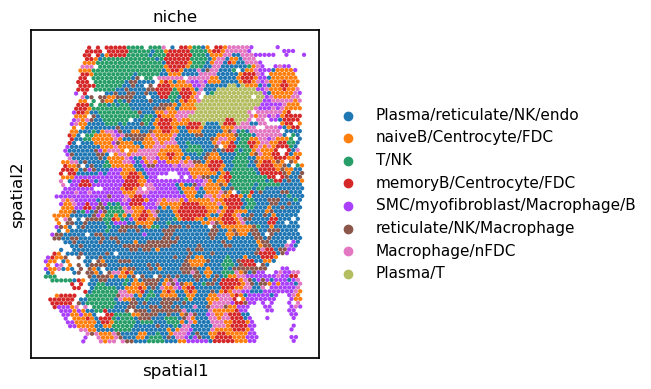

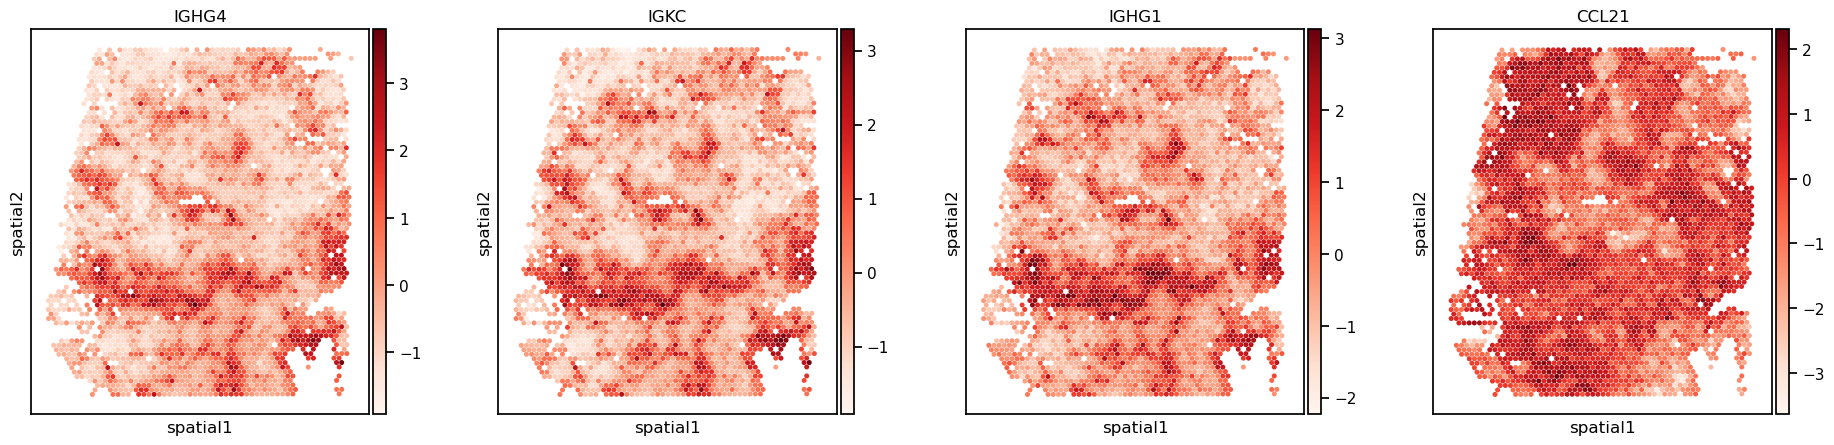

In [16]:

sq.pl.spatial_scatter(
    adata,
    color="niche",
    img=False, size=1.5,
)
sq.pl.spatial_scatter(
    adata, color=top_autocorr,  size=1.5, cmap="Reds", img=False, figsize=(5, 5),
    layer="scaled_counts"
)

These genes are highlighting different regions of the tissue.  Can you find out what cell type they probably belong to using the image above?

While we got some inside in the spatial location of these genes, we now want to link this to the cell clusters. This can be done, similar to the cluster annotation using the `sc.pl.dotplot` function.

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


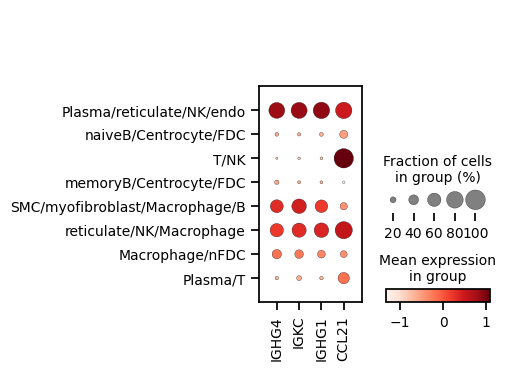

In [17]:
sc.pl.dotplot(adata, var_names=top_autocorr, groupby="niche",layer="scaled_counts")

Does this plot makes the identification of gene expression to cell types more easy ? 
What do you think, in which cells is the gene expressed? 

Why is CCL21 expressed in nearly all cell clusters ? 

Try to find out more informations about this genes using e.g. [Human Protein Atlas](https://www.proteinatlas.org/).